## **EXTRACTING COLORS OF IMAGES AND IDENTIFYING IMAGES BASED OFF OF SPECIFIC COLORS**

Extracting Colors out of Images using KMeans Algorithm

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2  # To use OpenCv
from skimage.color import rgb2lab,deltaE_cie76
import os
%matplotlib inline

 **NOTE**: RGB and CIE L * a * b* (or just "Lab") are two different color spaces, or ways of describing colors.
Lab is a conversion of the same information to a lightness component L*, and two color components - a * and b *. 

**NOTE** : deltaE_cie76 - Euclidean distance between two points in Lab color space

## **Using OpenCV**

In [2]:
image = cv2.imread("FinlandLake_image.jpg")  #read an image using OpenCv
print("Input type: ",type(image))
print("Image shape: ",image.shape)

Input type:  <class 'numpy.ndarray'>
Image shape:  (1080, 1920, 3)


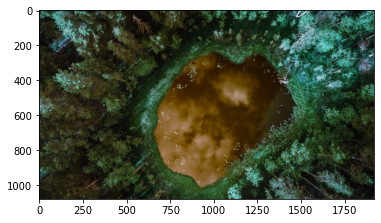

In [3]:
plt.imshow(image)  # display image

**NOTE** : Image Shape is (1080,1920,3)

1080 and 1920 --> pixels of image.         
3 --> as each pixel is combination of Red, Blue and Green colors.(rgb)






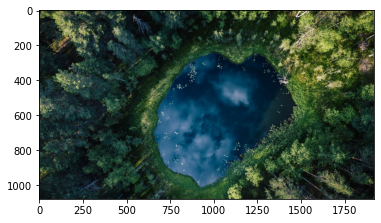

In [4]:

image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)  
#image using openCv is usually bgr...Hence used this to convert to rgb
#cvtColor method allows us to convert an image to other color space
#COLOR_BGR2RGB used to convert from bgr to rgb
plt.imshow(image)

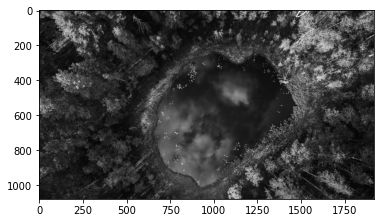

In [5]:
#Converting image to gray_image
image_gray =cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)  
plt.imshow(image_gray,cmap='gray')

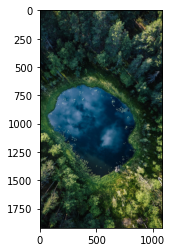

In [6]:
image_rotate = cv2.rotate(image, cv2.cv2.ROTATE_90_CLOCKWISE)
plt.imshow(image_rotate) #rotating images

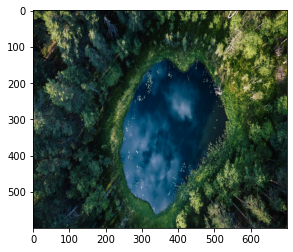

In [7]:
#Resizing image
img_resize = cv2.resize(image,(700, 600))
plt.imshow(img_resize)

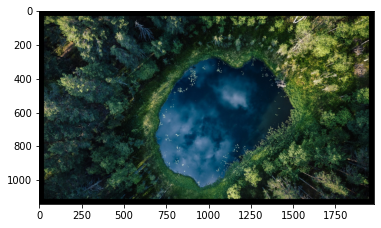

In [8]:
#image border
image_border = cv2.copyMakeBorder(image, 30, 30, 30, 30, cv2.BORDER_CONSTANT)
plt.imshow(image_border)

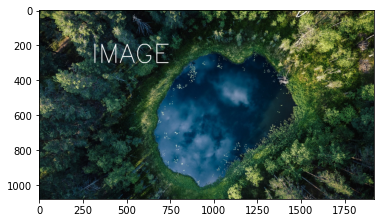

In [9]:
#Text on Image
font = cv2.FONT_HERSHEY_SIMPLEX  
fontScale = 5
org=(300,300)  #(x,y)
# white color in BGR 
color = (255, 255, 255) 
thickness = 4  #4px thickness
image_on_text = cv2.putText(image, 'IMAGE', org, font,  
                   fontScale, color, thickness, cv2.LINE_AA) 
plt.imshow(image_on_text)

## Color Identification

In [0]:
def rgb_to_hex(rgb_color):   #function to convert rgb to hex
    return '#{:02x}{:02x}{:02x}'.format(int(rgb_color[0]),int(rgb_color[1]),int(rgb_color[2]))

In [11]:
rgb_to_hex((255, 255, 195))

'#ffffc3'

In [0]:
from collections import Counter

In [13]:
c=Counter(['a', 'b', 'c', 'd', 'e','a','d','d','b'])
c  #Counter counts values of each unique value 

Counter({'a': 2, 'b': 2, 'c': 1, 'd': 3, 'e': 1})

In [0]:
def get_image(img):
  image = cv2.imread(img)  #read image using openCv
  image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)  #convert bgr to rgb
  return image    
#function to read image and return in rgb form

In [0]:
from sklearn.cluster import KMeans

In [0]:
def our_model(image,no_colors,chart):
  new_image = cv2.resize(image, (600, 400),interpolation = cv2.INTER_AREA)
  #interpolation is done when resizing images....for shrinking image we use INTER_AREA
  #Resizing an image needs a way to calculate pixel values for the new image from the original one
  new_image = new_image.reshape(new_image.shape[0]*new_image.shape[1], 3)
  #reshaping needs to be done...since KMeans requires 2D input
  model = KMeans(n_clusters = no_colors)
  labels= model.fit_predict(new_image)
   #forms clusters of colors 
 
  counts = Counter(labels)  # Used Counter to count all labels
   # sort to ensure correct color percentage on each display
  counts = dict(sorted(counts.items()))

  center_colors = model.cluster_centers_  #we get the centers of clusters (finding  all colors)
  sorted_colors = [center_colors[i]/255 for i in counts.keys()]
  # We get ordered colors by iterating through the keys becuse of sorting
  color_hex = [rgb_to_hex(sorted_colors[i]*255) for i in counts.keys()]
  color_rgb = [sorted_colors[i]*255 for i in counts.keys()]
  

  if (chart):
    plt.figure(figsize = (8, 7))
    plt.pie(counts.values(), labels = color_hex, colors = sorted_colors)

  return color_rgb

[array([12.8327593 , 24.38687693, 20.81613929]),
 array([ 56.27401238, 106.60839001, 140.87873462]),
 array([161.87805112, 168.07707092, 108.17278493]),
 array([50.84227488, 79.55592417, 52.42540284]),
 array([20.84296582, 46.67538606, 42.65142784]),
 array([101.46170432, 118.51560739,  68.83956486]),
 array([ 5.30533097, 65.22165253, 96.44251627])]

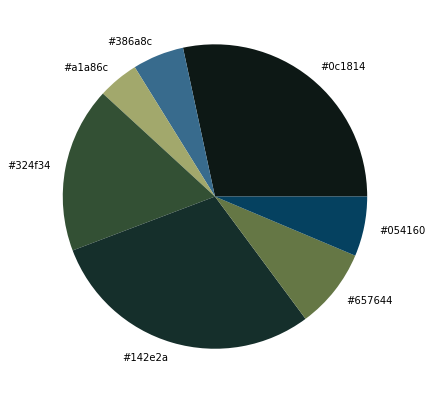

In [17]:
our_model(get_image("FinlandLake_image.jpg"),7,True)

In [0]:
#Color Chart of our image...showing top 8 colors

[array([26.91698138, 59.09512957, 52.68467248]),
 array([149.92496061, 158.21402311, 100.29680935]),
 array([ 41.54597857,  98.24775681, 132.32813095]),
 array([13.98879136, 28.61683893, 25.60655482]),
 array([ 78.04033129, 100.69055335,  60.23430561])]

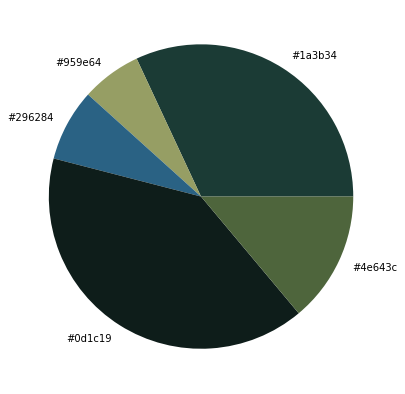

In [19]:
our_model(get_image("FinlandLake_image.jpg"),5,True)

Above we extracted colors from an image using KMeans

In [0]:
colors_dict = {
    'YELLOW':[255, 255, 0],
    'BLUE' :[0, 0, 128],
    'BROWN':[165,42,42],
    'BLACK':[0,0,0],
    'GREEN':[0, 128, 0]
} #Dictionary containg rgb values of 5 colors

In [21]:
type(colors_dict['YELLOW'])

list

In [0]:
photos=[] #list which will contain images from folder

In [0]:
def load_images_from_folder(folder):  #function to load all images from folder
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:  
            photos.append(img)
   

In [0]:
load_images_from_folder('images')

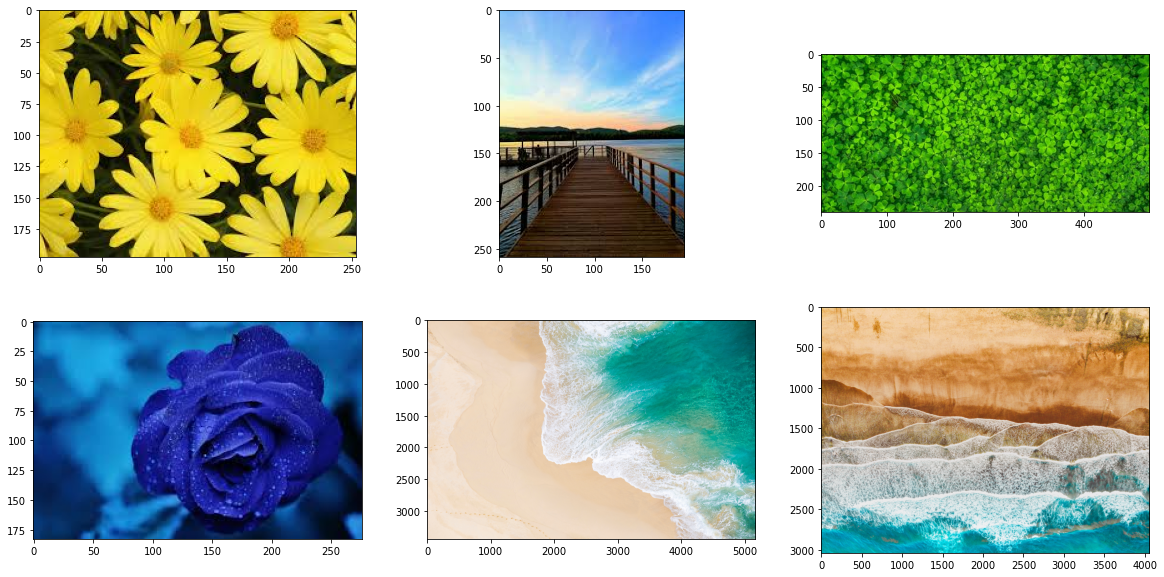

In [25]:
plt.figure(figsize=(20, 10))
for i in range(len(photos)):
    photos[i]=cv2.cvtColor(photos[i],cv2.COLOR_BGR2RGB) #changing from bgr to rgb
    plt.subplot(2, 3, i+1) #rows=2 , columns=3
    plt.imshow(photos[i])

PIE CHART FOR ALL IMAGES IN FOLDER


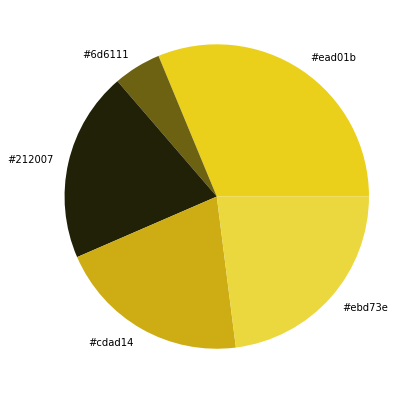

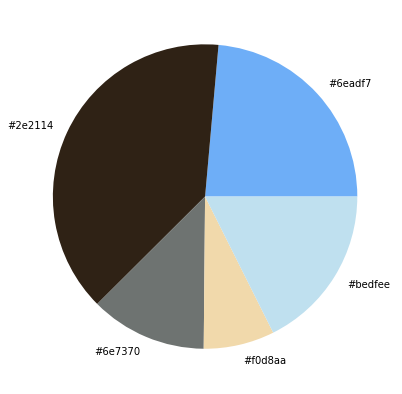

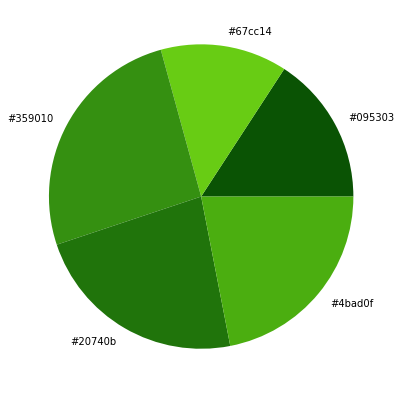

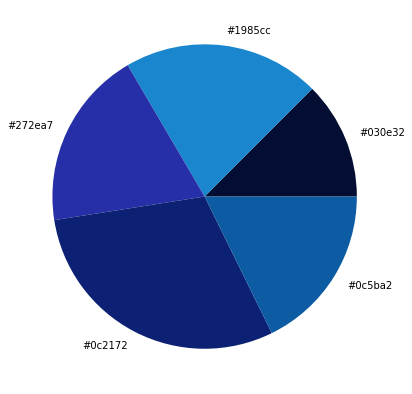

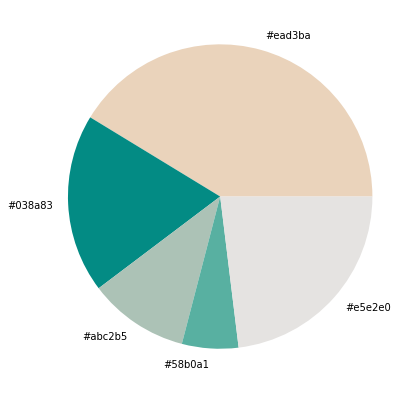

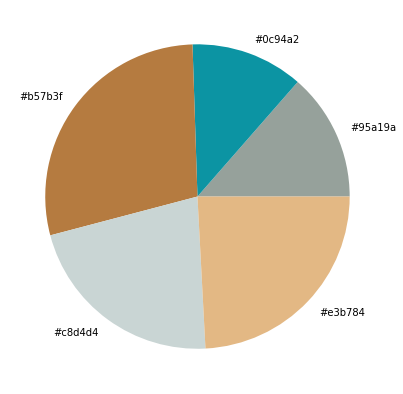

In [26]:
print("PIE CHART FOR ALL IMAGES IN FOLDER")
for i in range(len(photos)): 
   our_model(photos[i],5,True)

In [27]:
photos[1]

array([[[126, 191, 245],
        [126, 191, 245],
        [125, 190, 244],
        ...,
        [ 45, 129, 251],
        [ 37, 123, 246],
        [ 37, 123, 246]],

       [[127, 192, 246],
        [127, 192, 246],
        [126, 191, 245],
        ...,
        [ 45, 129, 251],
        [ 41, 125, 249],
        [ 40, 126, 249]],

       [[128, 194, 246],
        [128, 194, 246],
        [127, 192, 246],
        ...,
        [ 47, 130, 252],
        [ 46, 129, 251],
        [ 45, 129, 251]],

       ...,

       [[ 33,  49,  49],
        [ 58,  72,  73],
        [ 70,  82,  82],
        ...,
        [ 65,  31,   4],
        [ 74,  40,  13],
        [ 75,  40,  12]],

       [[ 20,  36,  36],
        [ 17,  31,  31],
        [  1,  11,  12],
        ...,
        [ 66,  31,   3],
        [ 68,  34,   7],
        [ 68,  34,   7]],

       [[  7,  23,  23],
        [  2,  16,  16],
        [  0,   6,   7],
        ...,
        [ 66,  31,   3],
        [ 62,  28,   1],
        [ 61,  27,   0]]

In [35]:
photos[1].shape

(259, 194, 3)

In [0]:
def match_images(pic,color,threshold_value = 100, number_colors = 10): 
    image_colors = our_model(pic, number_colors, False) 
    # returns number_colors colours of image and displays no pie chart
    selected_color=rgb2lab(np.uint8(np.asarray([[color]])))
    
    chosen_image = False  #initially false
    for i in range(number_colors):
        current_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        difference = deltaE_cie76(selected_color, current_color)
        #Eucledian distance is calculated to get diff between current and selected color
        if (difference < threshold_value):
            chosen_image = True
    return chosen_image

In [0]:
def display_chosen(pic,color,threshold,color_match):
  x=1
  for i in range(len(pic)):
     selected=match_images(pic[i],color,threshold,color_match)
     if(selected):
        plt.subplot(1, len(pic), x)
        plt.imshow(pic[i])
        x=x+1

## Yellow Coloured Images

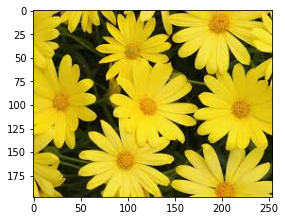

In [30]:
plt.figure(figsize=(30, 20))
display_chosen(photos,colors_dict['YELLOW'],40,5)

### Brown Coloured Images

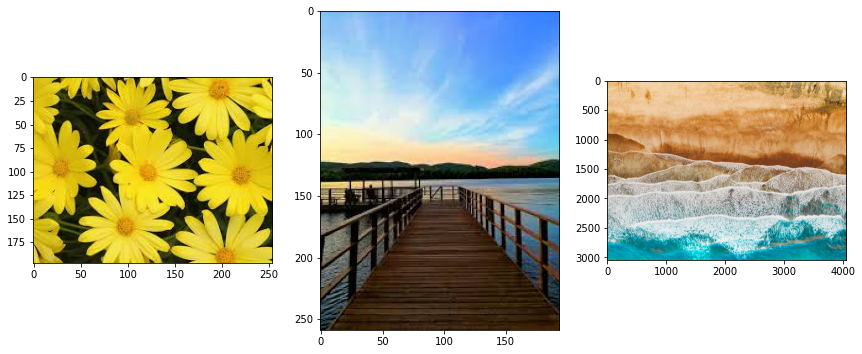

In [31]:
plt.figure(figsize=(30, 20))
display_chosen(photos,colors_dict['BROWN'],60,5)

## Blue Coloured Images

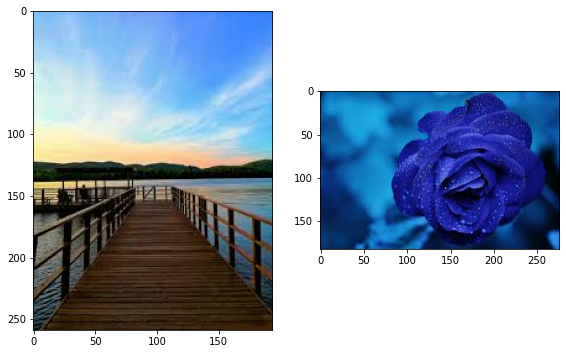

In [32]:
plt.figure(figsize=(30, 20))
display_chosen(photos,colors_dict['BLUE'],90,5)

## Green Coloured Images

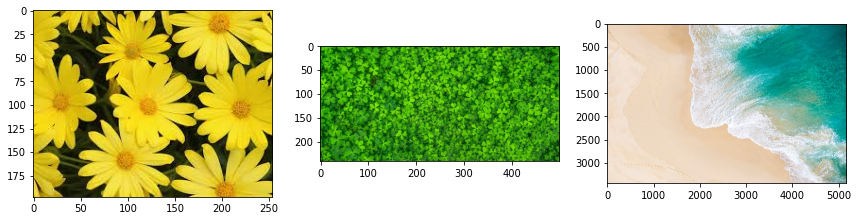

In [33]:
plt.figure(figsize=(30, 20))
display_chosen(photos,colors_dict['GREEN'],60,5)

In [0]:
#here by Green colored implies images which have green colour in them as one of the top 5 colours.
#All green colour varients with a difference of 60 is included